In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
from scipy.stats import kruskal
from statannot import add_stat_annotation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_palette("tab10")
font_name = "Heiti TC" # For mac
# font_name = "STXIHEI" # For win
mpl.rcParams['font.family'] = font_name
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.labelsize'] = 13

In [3]:
import numpy as np
import pandas as pd

In [4]:
files = [
    "data/exp_2_data/table vivoX30.txt", # stimulate, no buttom ad
    "data/exp_2_data/table 罗技.txt", # stimulate, no buttom ad
    "data/exp_2_data/table 王者荣耀.txt", # stimulate, no buttom ad
    "data/exp_2_data/table 苹果官方售后.txt", # stimulate, no buttom ad
    
    "data/exp_2_data/table 华为智能音箱.txt", # regular, with buttom ad
    "data/exp_2_data/table 汇源果汁.txt", # regular, with buttom ad
    "data/exp_2_data/table 美甲流行色.txt", # regular, with buttom ad
    "data/exp_2_data/table 雅虎财经.txt", # regular, with buttom ad
    
    "data/exp_2_data/table 海尔冰箱.txt", # study, with buttom ad
    "data/exp_2_data/table 爱尔兰双飞六日游.txt", # study, with buttom ad
    "data/exp_2_data/table 医疗保险.txt", # study, with buttom ad
    "data/exp_2_data/table 飞利浦咖啡机.txt", # study, with buttom ad
]
anno = [
        ["stimulate", "vivoX30"],
        ["stimulate", "Logitech"],
        ["stimulate", "King_of_glory"],
        ["stimulate", "apple_sales"],
    
        ["regular", "Huawei"],
        ["regular", "Huiyuan_juice"],
        ["regular", "trend_nail_color"],
        ["regular", "Yahoo_financial"],
    
        ["study", "Haier"],
        ["study", "Ireland_travel"],
        ["study", "Medical_insurance"],
        ["study", "Philips_coffee_machine"],
       ]

task_order = ['apple_sales', 'Logitech', 'King_of_glory', "vivoX30", "Huiyuan_juice", "trend_nail_color", "Huawei", 
             "Yahoo_financial", "Ireland_travel", "Medical_insurance", "Haier", "Philips_coffee_machine"]

In [5]:
def get_long_data(f, group=None, task_name=None):
    df = pd.read_csv(f, sep="\t").iloc[0:-1]
    data = df.iloc[:, 2::]
    rename_cols = []
    for c in data.columns:
        cs = c.split("_")
        rename_cols.append([cs[0], cs[2], cs[3]])
    data.columns = pd.MultiIndex.from_tuples(rename_cols)
    data.index = pd.MultiIndex.from_frame(df.iloc[:, 0:2])
    data = data.melt(ignore_index=False).reset_index()
    data.columns = ['Rec', 'Gender', 'Metric', 'Pos', 'Data_type', 'Value']
    data['group'] = group
    data['task_name'] = task_name
    return data

In [6]:
full_data = None
for f, an in zip(files, anno):
    data = get_long_data(f, *an)
    if full_data is None:
        full_data = data
    else:
        full_data = pd.concat([full_data, data])
full_data.reset_index(drop=True, inplace=True)

In [7]:
full_data

,Rec,Gender,Metric,Pos,Data_type,Value,group,task_name
0,Rec A02,1,Time to First Fixation,ad1,Mean,2.009,stimulate,vivoX30
1,Rec A03,1,Time to First Fixation,ad1,Mean,0.436,stimulate,vivoX30
2,Rec A04,-,Time to First Fixation,ad1,Mean,-,stimulate,vivoX30
3,Rec A05,1,Time to First Fixation,ad1,Mean,1.161,stimulate,vivoX30
4,Rec A06,1,Time to First Fixation,ad1,Mean,1.607,stimulate,vivoX30
...,...,...,...,...,...,...,...,...
39520,Rec 28,1,Fixation Count (Include Zeros),an6,Sum,0.0,study,Philips_coffee_machine
39521,Rec 29,1,Fixation Count (Include Zeros),an6,Sum,0.0,study,Philips_coffee_machine
39522,Rec 30,1,Fixation Count (Include Zeros),an6,Sum,10.0,study,Philips_coffee_machine
39523,Rec 31,1,Fixation Count (Include Zeros),an6,Sum,0.0,study,Philips_coffee_machine


In [14]:
used_data = full_data[(full_data['Metric'].str.startswith("Total")) & (full_data['Data_type'] == 'Sum')].copy()

In [16]:
relative_fixation_duration = []
for n, g in used_data.groupby(['Rec', 'task_name'], sort=False):
    value_sum = g['Value'].sum()
    if value_sum != 0:
        relative_fixation_duration += list(g['Value'] / value_sum)
    else:
        relative_fixation_duration += list(g['Value'])

In [17]:
used_data['relative_fixation_duration'] = relative_fixation_duration
used_data['new_rec'] = [i[-2::] for i in used_data['Rec']]

In [18]:
used_data

,Rec,Gender,Metric,Pos,Data_type,Value,group,task_name,relative_fixation_duration,new_rec
1054,Rec A02,1,Total Fixation Duration (Include Zeros),ad1,Sum,3.692,stimulate,vivoX30,0.143045,02
1055,Rec A03,1,Total Fixation Duration (Include Zeros),ad1,Sum,1.675,stimulate,vivoX30,0.268927,03
1056,Rec A04,-,Total Fixation Duration (Include Zeros),ad1,Sum,0.0,stimulate,vivoX30,0.127509,04
1057,Rec A05,1,Total Fixation Duration (Include Zeros),ad1,Sum,0.9,stimulate,vivoX30,0.017745,05
1058,Rec A06,1,Total Fixation Duration (Include Zeros),ad1,Sum,1.616,stimulate,vivoX30,0.005812,06
...,...,...,...,...,...,...,...,...,...,...
38497,Rec 28,1,Total Fixation Duration (Include Zeros),an6,Sum,0.0,study,Philips_coffee_machine,0.057812,28
38498,Rec 29,1,Total Fixation Duration (Include Zeros),an6,Sum,0.0,study,Philips_coffee_machine,0.086884,29
38499,Rec 30,1,Total Fixation Duration (Include Zeros),an6,Sum,1.467,study,Philips_coffee_machine,0.017532,30
38500,Rec 31,1,Total Fixation Duration (Include Zeros),an6,Sum,0.0,study,Philips_coffee_machine,0.321793,31


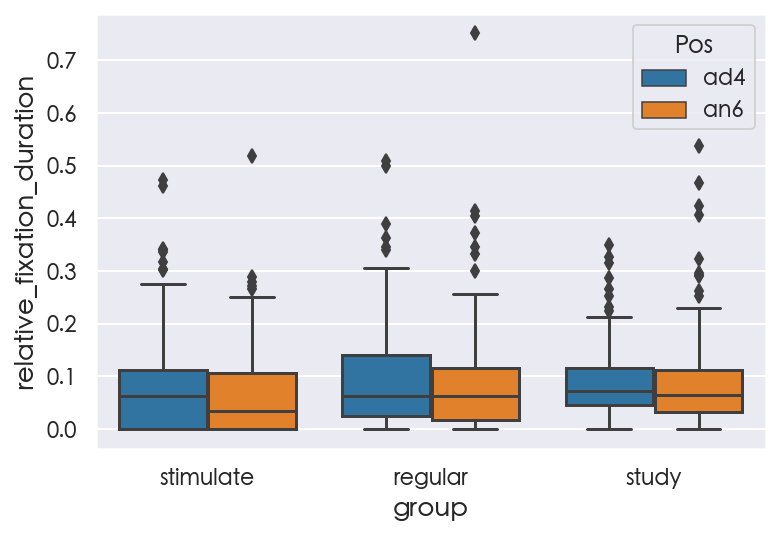

In [21]:
plot_data = used_data[used_data['Pos'].isin(['an6', 'ad4'])]
sns.boxplot(data=plot_data, x='group', y='relative_fixation_duration', hue='Pos')

Here we are going to perform time-series clustering

In [24]:
def get_time_data(pos='ad4', metric="relative_fixation_duration"):
    rec_order = []
    time_data = []
    for n, g in used_data[used_data['Pos'] ==  pos].groupby('new_rec'):
        time = []
        for o in task_order:
            t = g[g['task_name'] == o][metric].values[0]
            time.append(t)
        time = [0, np.mean(time[4:8]), np.mean(time[8:12])]
        time_data.append(time)
        rec_order.append(n)
    return time_data

In [25]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [36]:
def plot_kmeans_time_cluster(time_data):
    cs = 3
    ts_data = TimeSeriesScalerMeanVariance().fit_transform(time_data)
    sdtw_km = TimeSeriesKMeans(n_clusters=cs,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=0)
    y_pred = sdtw_km.fit_predict(ts_data)
    sz = ts_data.shape[1]
    
    fig, axes = plt.subplots(1, cs, figsize=(cs*4, cs))
    for yi, ax in enumerate(axes.flatten()):
        plt.subplot(ax)
        counts = 0
        for xx in ts_data[y_pred == yi]:
            plt.plot(["刺激组", "中间组", "学习组"], xx.ravel(),"k-", alpha=.2)
            counts += 1
        plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
        plt.xlim(-0.5, sz-0.5)
        plt.ylim(-2, 2)
        plt.title(f"模式{yi+1}: {counts}个记录")

    plt.tight_layout()
    
    

In [30]:
full_data.Pos.unique()

array(['ad1', 'ad2', 'ad3', 'ad4', 'ad5', 'an1', 'an2', 'an3', 'an4',
       'an5', 'an6'], dtype=object)

ad4, relative

In [27]:
time_data = get_time_data()
plot_kmeans_time_cluster(time_data)

In [ ]:
ad4, total

0.083 --> 0.051 --> 0.039 --> 0.039 --> 


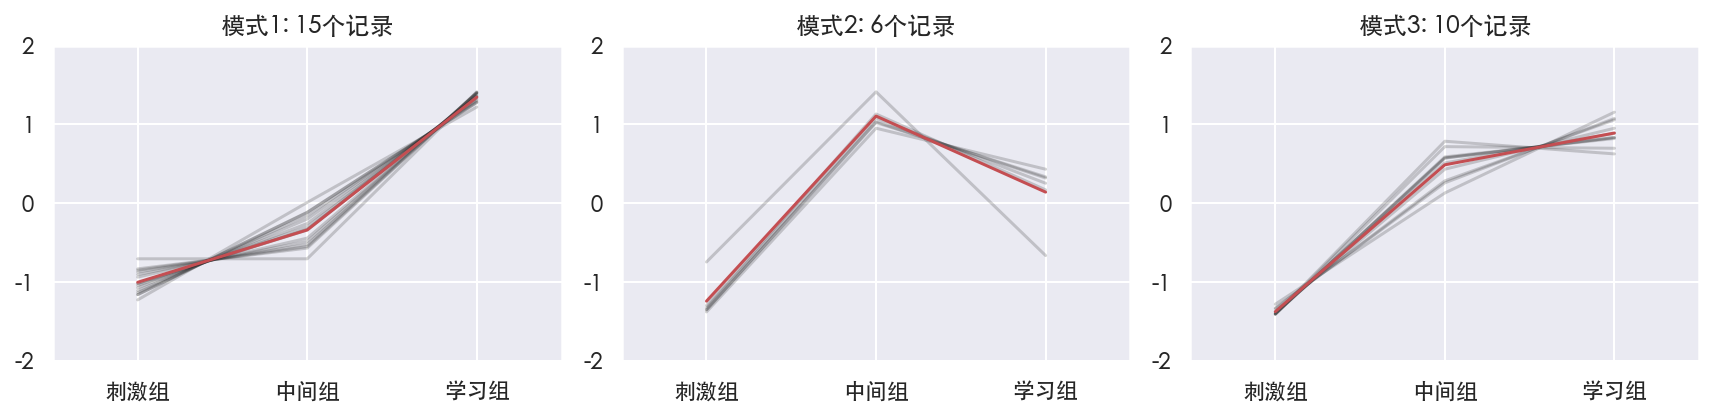

In [31]:
time_data = get_time_data(metric="Value")
plot_kmeans_time_cluster(time_data)

0.083 --> 0.013 --> 0.013 --> 0.013 --> 


Text(0.5, 1.02, '顶部广告')

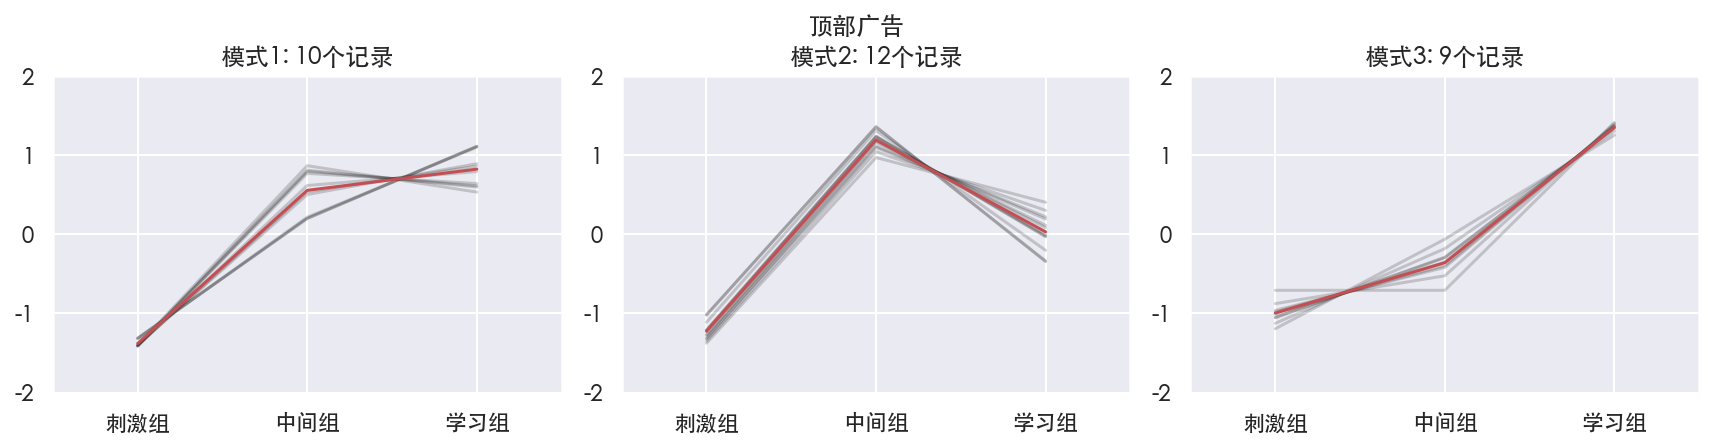

In [38]:
time_data = get_time_data(pos="ad1")
plot_kmeans_time_cluster(time_data)
plt.suptitle("顶部广告", y=1.02)

0.072 --> 0.035 --> 0.023 --> 0.016 --> 0.016 --> 


Text(0.5, 1.02, '右侧广告')

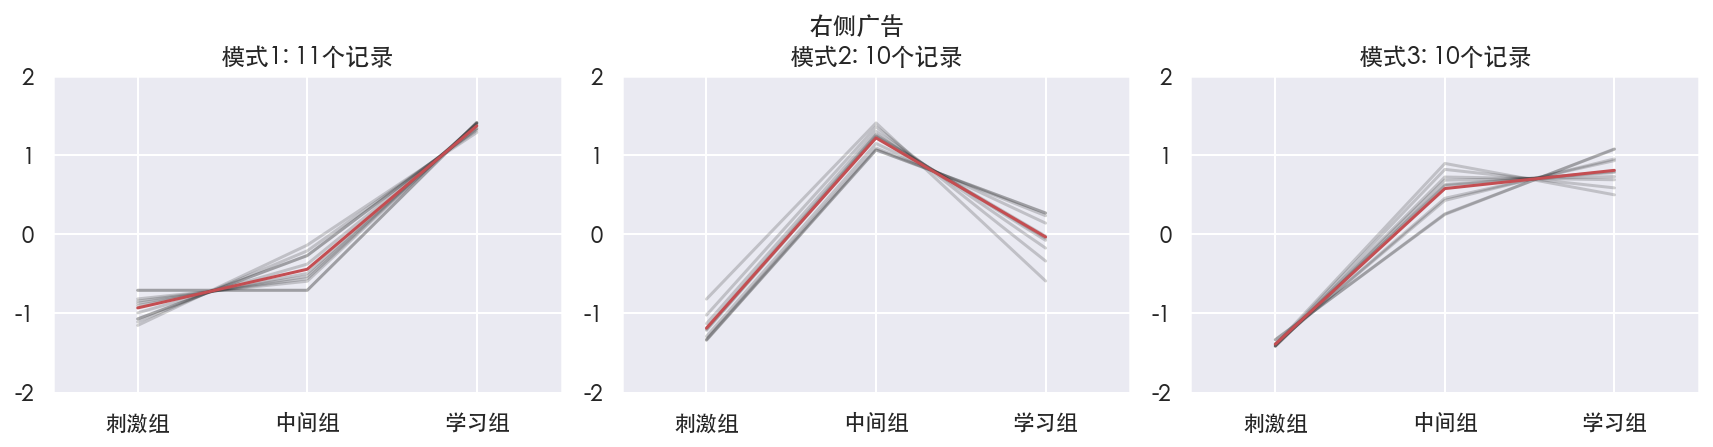

In [39]:
time_data = get_time_data(pos="ad5")
plot_kmeans_time_cluster(time_data)
plt.suptitle("右侧广告", y=1.02)

In [41]:
ts_data = TimeSeriesScalerMeanVariance().fit_transform(time_data)
#ts_data = np.array(time_data)

In [42]:
cs = 3 # cluster size
sdtw_km = TimeSeriesKMeans(n_clusters=cs,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=0)
y_pred = sdtw_km.fit_predict(ts_data)
sz = ts_data.shape[1]

0.042 --> 0.037 --> 0.023 --> 0.018 --> 0.016 --> 0.015 --> 0.015 --> 0.015 --> 


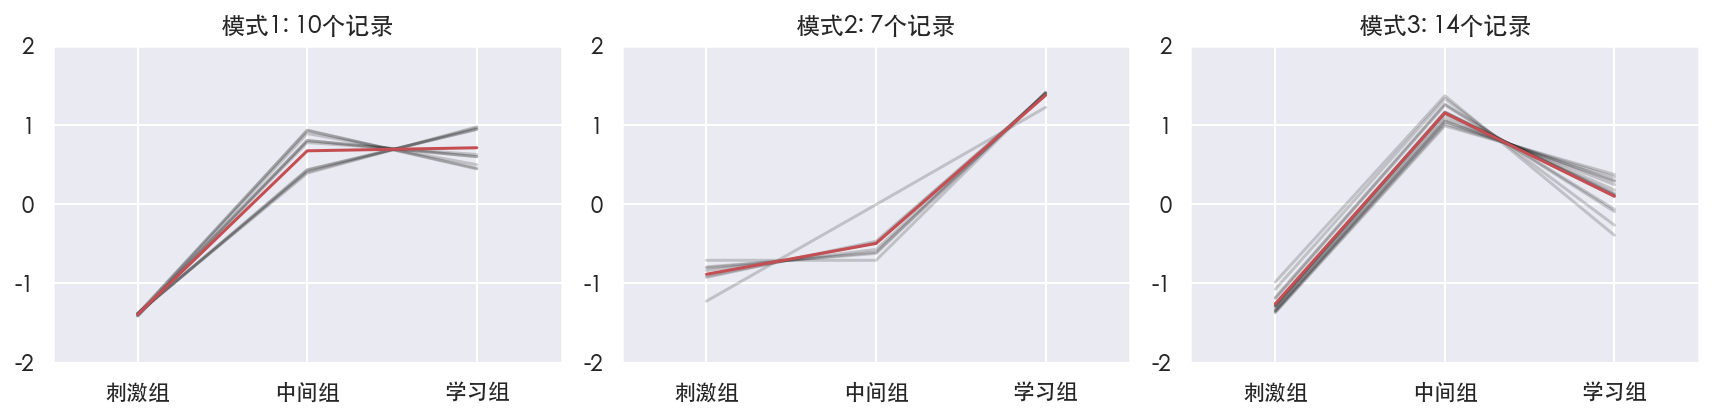

In [43]:
fig, axes = plt.subplots(1, cs, figsize=(cs*4, cs))
for yi, ax in enumerate(axes.flatten()):
    plt.subplot(ax)
    counts = 0
    for xx in ts_data[y_pred == yi]:
        plt.plot(["刺激组", "中间组", "学习组"], xx.ravel(),"k-", alpha=.2)
        counts += 1
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(-0.5, sz-0.5)
    plt.ylim(-2, 2)
    plt.title(f"模式{yi+1}: {counts}个记录")
#     ax.set(xticklabels=)
#     plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
#              transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

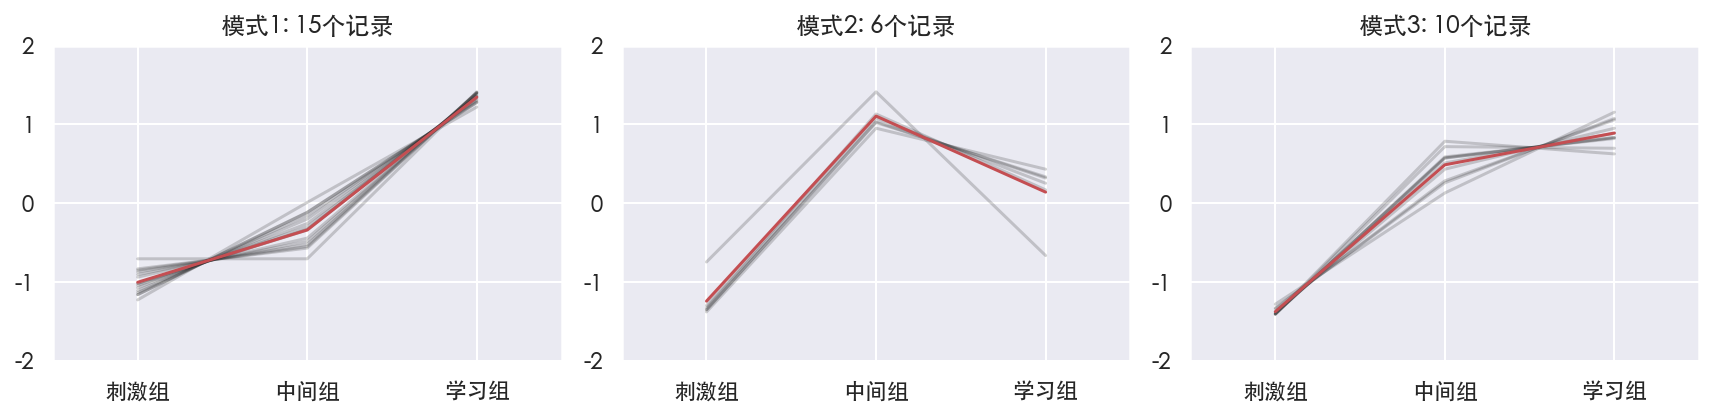

In [38]:
fig, axes = plt.subplots(1, cs, figsize=(cs*4, cs))
for yi, ax in enumerate(axes.flatten()):
    plt.subplot(ax)
    counts = 0
    for xx in ts_data[y_pred == yi]:
        plt.plot(["刺激组", "中间组", "学习组"], xx.ravel(),"k-", alpha=.2)
        counts += 1
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(-0.5, sz-0.5)
    plt.ylim(-2, 2)
    plt.title(f"模式{yi+1}: {counts}个记录")
#     ax.set(xticklabels=)
#     plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
#              transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [22]:
pattern_rec = {0:[], 1:[], 2:[]}
for pattern, rec in zip(y_pred, rec_order):
    pattern_rec[pattern].append(rec)

In [23]:
for k, v in pattern_rec.items():
    print(f"Pattern {k} in following records: {', '.join(v)}")

Pattern 0 in following records: 03, 04, 07, 08, 11, 12, 13, 14, 21, 22, 23, 25, 27, 28, 32
Pattern 1 in following records: 02, 06, 10, 16, 17, 19
Pattern 2 in following records: 05, 09, 15, 18, 20, 24, 26, 29, 30, 31


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

stimulate v.s. regular: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=7.150e+03
regular v.s. study: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.489e-01 U_stat=7.038e+03
stimulate v.s. study: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.115e-01 U_stat=6.512e+03


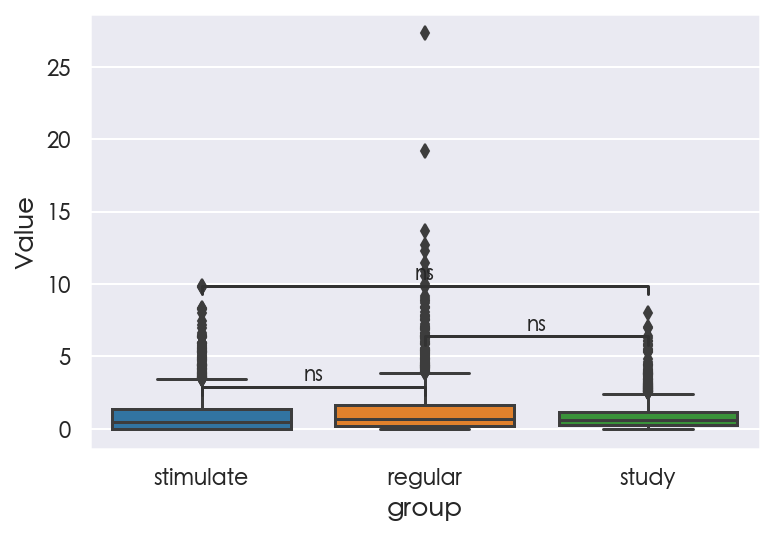

In [22]:
ax = sns.boxplot(data=used_data, x="group", y='Value')
test_results = add_stat_annotation(ax, 
                                   data=used_data[used_data['Pos'] == 'ad4'], x="group", y='relative_fixation_duration',
                                   test='Mann-Whitney', text_format='star',
                                   box_pairs=[("stimulate", "regular"), ("stimulate", "study"), ("regular", "study")],
                                  )